In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

In [3]:
#Import csv
raw_game_data = pd.read_csv("vgsales-12-4-2019.csv")
raw_game_data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
#Filter columns to only ones we need for analysis
base_game_df = raw_game_data.loc[:, ["Name", "Genre", "Platform", "Critic_Score", "Global_Sales", "NA_Sales",
                                     "PAL_Sales", "JP_Sales", "Other_Sales", "Year"]]

#Rename columns
base_game_df = base_game_df.rename(columns={"Critic_Score": "Critic Score", "Global_Sales": "Global Sales", "NA_Sales": "NA Sales",
                                           "PAL_Sales": "PAL Sales", "JP_Sales": "JP Sales", "Other_Sales": "Other Sales"})

base_game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
0,Wii Sports,Sports,Wii,7.7,NaN,NaN,NaN,NaN,NaN,2006.0
1,Super Mario Bros.,Platform,NES,10.0,NaN,NaN,NaN,NaN,NaN,1985.0
2,Mario Kart Wii,Racing,Wii,8.2,NaN,NaN,NaN,NaN,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,8.0,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...
55787,Indivisible,Role-Playing,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,Lost Ember,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,Lost Ember,Adventure,PS4,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,Lost Ember,Adventure,XOne,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [5]:
#Filter Year to 2009-2019
game_df = base_game_df[(base_game_df['Year'] >= 2013) & (base_game_df['Year'] <= 2017)]
#game_df = base_game_df[base_game_df["Year"] >= 2014]
game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
19,Grand Theft Auto V,Action,PS3,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
20,Grand Theft Auto V,Action,PS4,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
28,Pokemon X/Y,Role-Playing,3DS,8.9,NaN,NaN,NaN,NaN,NaN,2013.0
31,Pokemon Sun/Moon,Role-Playing,3DS,9.0,NaN,NaN,NaN,NaN,NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...
55756,Yodanji,Role-Playing,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
55758,Yono and the Celestial Elephants,Adventure,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
55759,Yooka-Laylee,Platform,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
55775,ZOMBIE GOLD RUSH,Action,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0


In [6]:
game_df2 = game_df.loc[:, ["Genre", "Global Sales", "Year"]]
game_df2.head()

#drop NaN's
game_df3 = game_df2.dropna()
game_df3

,Genre,Global Sales,Year
19,Action,20.32,2013.0
20,Action,19.39,2014.0
32,Action,15.86,2013.0
34,Shooter,15.09,2015.0
50,Shooter,13.40,2017.0
...,...,...,...
21141,Fighting,0.00,2013.0
21148,Misc,0.00,2014.0
21152,Puzzle,0.00,2013.0
21162,Misc,0.00,2014.0


In [27]:
game_df3 = game_df3.replace({"Action": "Action Adventure", "Action-Adventure": "Action Adventure", "Adventure": "Action Adventure",
    "Role-Playing": "MMO/Role-Playing", "MMO": "MMO/Role-Playing", "Visual Novel": "MMO/Role-Playing",
    "Sports": "Sports/Simulation", "Simulation": "Sports/Simulation", "Racing": "Sports/Simulation",
    "Puzzle": "Puzzle/Party", "Party": "Puzzle/Party", "Music": "Puzzle/Party", "Board Game": "Puzzle/Party", "Strategy": "Puzzle/Party",
    "Education": "MISC", "Platform": "MISC", "Misc": "MISC"})
game_df3

,Genre,Global Sales,Year
19,Action Adventure,20.32,2013.0
20,Action Adventure,19.39,2014.0
32,Action Adventure,15.86,2013.0
34,Shooter,15.09,2015.0
50,Shooter,13.40,2017.0
...,...,...,...
21141,Fighting,0.00,2013.0
21148,MISC,0.00,2014.0
21152,Puzzle/Party,0.00,2013.0
21162,MISC,0.00,2014.0


In [28]:
# Group genres together
game_year = game_df3.groupby(['Genre', 'Year'])
# Get the total global sales per year
yearly_sales = game_year['Global Sales'].sum()
# Chart the Data

yearly_sales

Genre              Year  
Action Adventure   2013.0    103.84
                   2014.0     99.89
                   2015.0     69.24
                   2016.0     50.51
                   2017.0     45.15
Fighting           2013.0      7.49
                   2014.0      5.94
                   2015.0      9.61
                   2016.0      3.99
                   2017.0      5.79
MISC               2013.0     28.42
                   2014.0     48.42
                   2015.0      5.56
                   2016.0     11.01
                   2017.0     17.53
MMO/Role-Playing   2013.0      8.80
                   2014.0     21.03
                   2015.0     38.46
                   2016.0     24.38
                   2017.0     25.38
Puzzle/Party       2013.0     12.74
                   2014.0      8.75
                   2015.0     12.46
                   2016.0      9.17
                   2017.0     10.47
Shooter            2013.0     67.20
                   2014.0     61.18
  

In [29]:
genre_sales = pd.DataFrame({
    "Global Sales": yearly_sales
})

genre_sales

Global Sales
Genre             Year                
Action Adventure  2013.0        103.84
                  2014.0         99.89
                  2015.0         69.24
                  2016.0         50.51
                  2017.0         45.15
Fighting          2013.0          7.49
                  2014.0          5.94
                  2015.0          9.61
                  2016.0          3.99
                  2017.0          5.79
MISC              2013.0         28.42
                  2014.0         48.42
                  2015.0          5.56
                  2016.0         11.01
                  2017.0         17.53
MMO/Role-Playing  2013.0          8.80
                  2014.0         21.03
                  2015.0         38.46
                  2016.0         24.38
                  2017.0         25.38
Puzzle/Party      2013.0         12.74
                  2014.0          8.75
                  2015.0         12.46
                  2016.0          9.17
                  2017.0         10.47
Shooter           2013.0         67.20
                  2014.0         61.18
                  2015.0         66.74
                  2016.0         62.36
                  2017.0         48.72
Sports/Simulation 2013.0         56.75
                  2014.0         59.15
                  2015.0         54.17
                  2016.0         53.07
                  2017.0         56.10

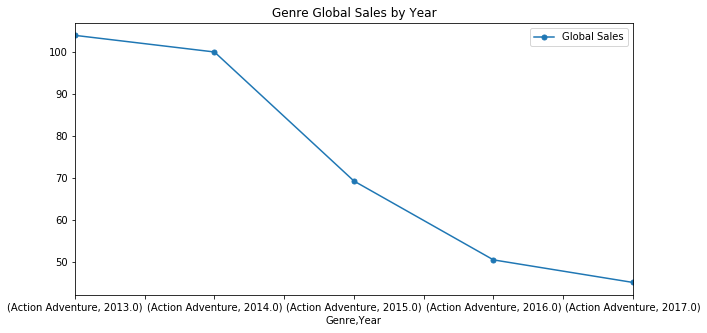

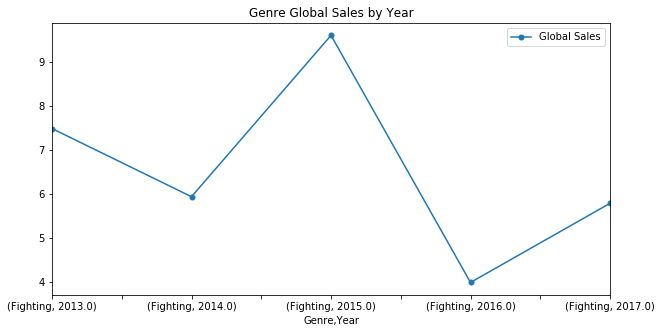

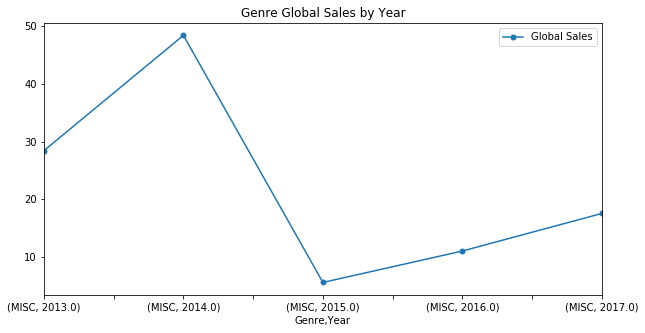

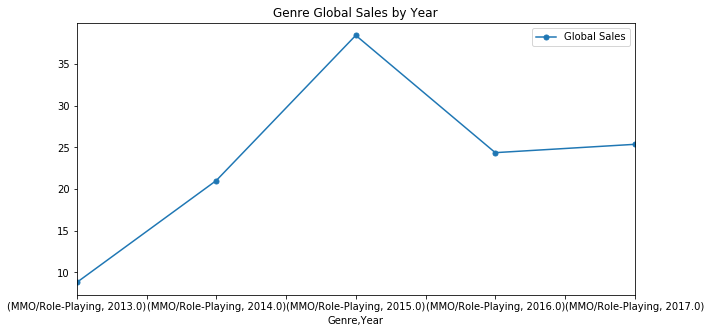

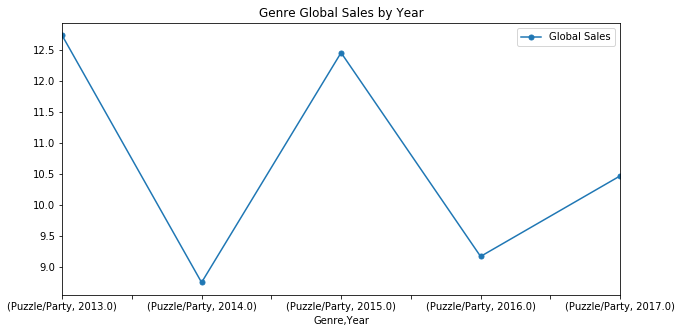

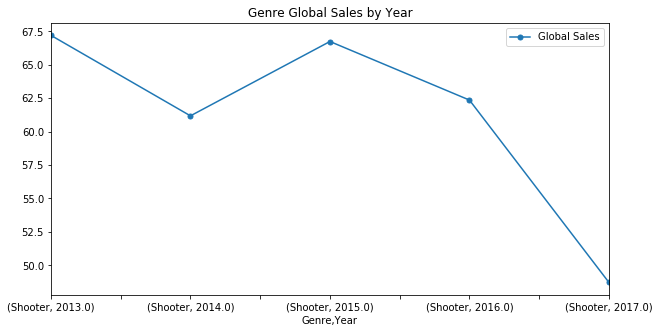

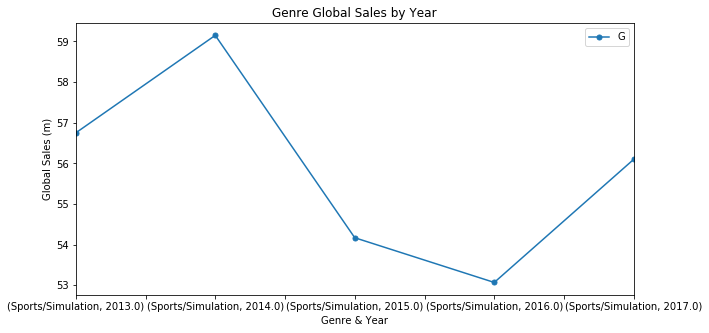

In [30]:
genre_sales.groupby("Genre").plot( y="Global Sales", figsize=(10,5), marker='.', markersize=10, title='Genre Global Sales by Year')
plt.xlabel("Genre & Year")
plt.ylabel("Global Sales (m)")
plt.legend("Genre")
